# PRACTICAL 8: Apply Principal Component Analysis on Crime dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('3B.1 Crime against Women in Metropolitan Cities.xlsx')
df.rename(columns = {2018:'Year_2018',2019:'Year_2019',2020:'Year_2020'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   City                                      20 non-null     object 
 1   Year_2018                                 20 non-null     int64  
 2   Year_2019                                 20 non-null     int64  
 3   Year_2020                                 20 non-null     int64  
 4   Actual Population (in Lakhs) (2011)       20 non-null     float64
 5   Rate of Total Crime against Women (2020)  20 non-null     float64
 6   Chargesheeti ng Rate (2020)               20 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.2+ KB


In [3]:
index = df['City'][0:19]
df = df[0:19].set_index('City')

df['Total Crime Rate > 50'] = (df['Rate of Total Crime against Women (2020)'] > 50)
df['Total Crime Rate > 50'] = df['Total Crime Rate > 50'].map({True:'yes', False:'no'})

df.drop(['Chargesheeti ng Rate (2020)','Rate of Total Crime against Women (2020)'],axis=1,inplace=True)
df.head(3).transpose()

City,Ahmedabad\n(Gujarat),Bengaluru\n(Karnataka),Chennai\n(Tamil Nadu)
Year_2018,1416,3427,761
Year_2019,1633,3486,729
Year_2020,1524,2730,576
Actual Population (in Lakhs) (2011),30.0,40.6,43.1
Total Crime Rate > 50,yes,yes,no


In [4]:
# standardizing the data

from sklearn.preprocessing import StandardScaler

features = ['Year_2018', 'Year_2019', 'Year_2020','Actual Population (in Lakhs) (2011)']

# Separating out the features
x = df[features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [5]:
#first 5 standardized features

x[:5]

array([[-0.30962093, -0.25168779, -0.15472186,  0.06570385],
       [ 0.4648165 ,  0.39247999,  0.40140311,  0.51888037],
       [-0.56186187, -0.56594989, -0.59187482,  0.62576163],
       [-0.8137177 , -0.78982687, -0.81275696, -0.75941945],
       [ 3.65999671,  3.66581176,  3.65330468,  2.02376846]])

In [6]:
# performing PCA
# transforming 4 dimensional data to 2 dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=index,columns = ['Principal Component 1', 'Principal Component 2'])

finalDf = pd.concat([principalDf, df[['Total Crime Rate > 50']]], axis = 1)
finalDf

,Principal Component 1,Principal Component 2,Total Crime Rate > 50
City,,,
Ahmedabad\n(Gujarat),-0.343526,0.237258,yes
Bengaluru\n(Karnataka),0.880353,0.152721,yes
Chennai\n(Tamil Nadu),-0.620875,0.994273,no
Coimbatore\n(Tamil Nadu),-1.586614,-0.076125,no
Delhi City,6.587069,-0.941052,yes
Ghaziabad\n(Uttar Pradesh),-1.190087,-0.248574,no
Hyderabad\n(Telangana),0.391497,0.240756,yes
Indore\n(Madhya Pradesh),-0.693906,-0.522394,yes
Jaipur\n(Rajasthan),0.014409,-0.687503,yes


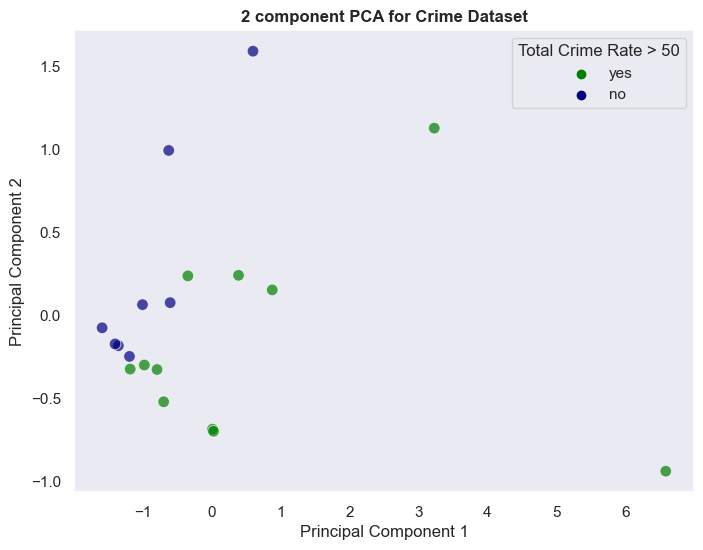

In [7]:
# plotting the reduced data

plt.figure(figsize=(8,6))
sns.set_theme(style='dark')

sns.scatterplot(data=finalDf,x='Principal Component 1',y='Principal Component 2',
                hue='Total Crime Rate > 50',palette=['green','navy'],alpha=0.7,s=70)
plt.title('2 component PCA for Crime Dataset',fontweight='bold')

plt.show()